# 神经网络（深度学习）
---
深度学习在许多机器学习应用中都有巨大的潜力，但深度学习算法往往经过精确调整，只适用于特定的使用场景。这里只讨论一些相对简单的方法，即用于分类和回归的多层感知机（multilayer perceptron，MLP），它可以作为研究更复杂的深度学习方法的起点。MLP 也被称为（普通）前馈神经网络，有时也简称为神经网络。

## 神经网络模型
---
MLP可以被视为广义的线性模型，执行多层处理后得到结论。

线性回归的预测公式为：

ŷ = w[0] * x[0] + w[1] * x[1] + … + w[p] * x[p] + b

ŷ是输入特征x[0]到x[p]的加权求和，权重为学到的系数w[0]到w[p]。

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

import seaborn as sns
sns.set(style = "white")

import warnings
warnings.filterwarnings("ignore")

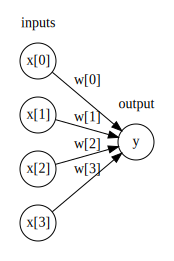

In [3]:
display(mglearn.plots.plot_logistic_regression_graph())

图中，左边的每个结点代表一个输入特征，连线代表学到的系数，右边的结点代表输出，是输入的加权求和。

在MLP中，多次重复这个计算加权求和的过程，首先计算代表中间过程的隐单元(hidden unit)，然后再计算这些隐单元的加权求和并得到最终结果：

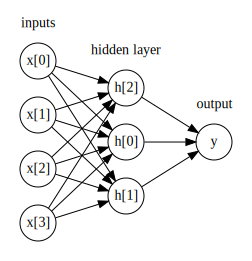

In [4]:
display(mglearn.plots.plot_single_hidden_layer_graph())

这个模型需要学习更多的系数（也叫作权重）：在每个输入与每个隐单元（隐单元组成了隐层）之间有一个系数，在每个隐单元与输出之间也有一个系数。

从数学的角度看，计算一系列加权求和与只计算一个加权求和是完全相同的，因此，为了让这个模型真正比线性模型更为强大，我们还需要一个技巧。在计算完每个隐单元的加权求和之后，对结果再应用一个非线性函数——通常是校正非线性（rectifying nonlinearity，也叫校正线性单元或relu）或正切双曲线（tangens hyperbolicus，tanh）。然后将这个函数的结果用于加权求和，计算得到输出ŷ。

多次重复这个计算加权求和的过程，首先计算代表中间过程的隐单元(hidden unit)，然后再计算这些隐单元的加权求和并得到最终结果，上图为单隐层的多层感知机图示。这个模型需要学习更多的系数（也叫作权重）：在每个输入与每个隐单元（隐单元组成了隐层）之间有一个系数，在每个隐单元与输出之间也有一个系数。

Text(0, 0.5, 'relu(x), tanh(x)')

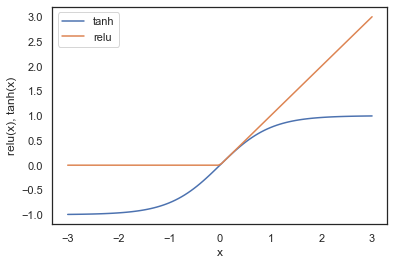

In [6]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label = 'tanh')
plt.plot(line, np.maximum(line, 0),label = 'relu')
plt.legend(loc = 'best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

上图为双曲正切激活函数与校正线性激活函数。relu截断小于0的值，而tanh在输入值较小时接近-1，在输入值较大时接近1。有了这两种非线性函数，神经网络可以学习比线性模型复杂得多的函数。

一个小型神经网络，计算回归问题的ŷ的完整公式如下（使用tanh非线性）：
* h[0] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3] + b[0])
* h[1] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3] + b[1])
* h[2] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3] + b[2])
* ŷ = v[0] * h[0] + v[1] * h[1] + v[2] * h[2] + b
其中，w是输入x与隐层h之间的权重，v是隐层h与输出ŷ之间的权重。权重w和v要从数据中学习得到，x是输入特征，ŷ是计算得到的输出，h是计算的中间结果。

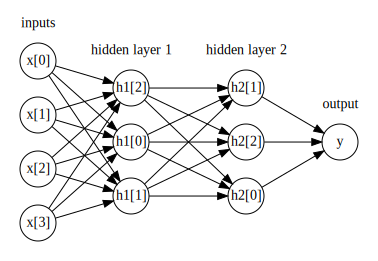

In [7]:
mglearn.plots.plot_two_hidden_layer_graph()

上图为有两个隐层的多层感知机图示。

需要用户设置的一个重要参数值是隐层中的结点个数。对于非常复杂的数据，这个值可以大到10000，也可以添加多个隐层。如上图所示。这些由许多计算层组成的大型神经网络，正是术语“深度学习”的灵感来源。

## 神经网络调参

Text(0, 0.5, 'Feature 1')

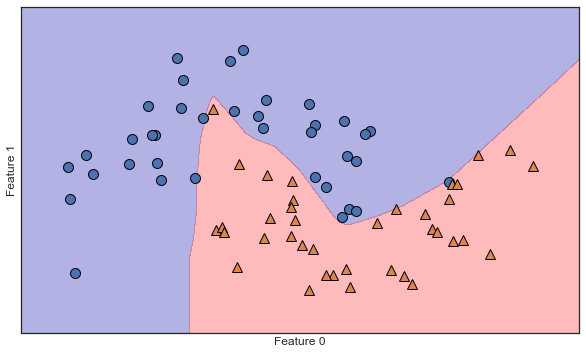

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify = y, random_state = 42)
mlp = MLPClassifier(solver = 'lbfgs', random_state = 0)
mlp.fit(X_train, y_train)
plt.figure(figsize = (10, 6))
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha =.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

上图为 包含100个隐单元的神经网络在two_moons数据集上学到的决策边界

如图，神经网络学到的决策边界完全是非线性的，但相对平滑。我们用到了solver='lbfgs'。

默认情况下，MLP使用100个隐结点，这对于这个小型数据集来说已经相当多了。我们可以减少其数量（从而降低了模型复杂度），但仍然得到很好的结果：

Text(0, 0.5, 'Feature 1')

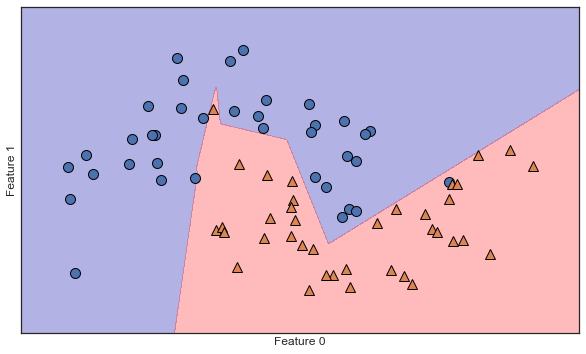

In [12]:
mlp = MLPClassifier(solver = 'lbfgs', random_state = 0, hidden_layer_sizes =[10])
mlp.fit(X_train, y_train)

plt.figure(figsize = (10, 6))
mglearn.plots.plot_2d_separator(mlp,X_train, fill = True, alpha =.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

上图为包含10个隐单元的神经网络在two_moons数据集上学到的决策边界

只有10个隐单元时，决策边界看起来更加参差不齐。默认的非线性是relu。如果使用单隐层，那么决策函数将由10个直线段组成。如果想得到更加平滑的决策边界，可以添加更多的隐单元、添加第二个隐层或者使用tanh非线性。

Text(0, 0.5, 'Feature 1')

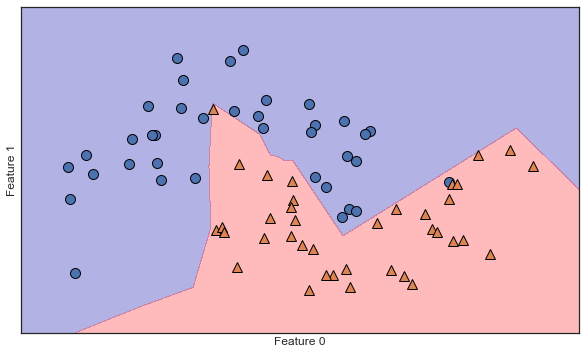

In [13]:
# 使用2个隐层，每个包含10个单元，激活函数为relu
mlp = MLPClassifier(solver = 'lbfgs',random_state = 0, hidden_layer_sizes = [10,10])
mlp.fit(X_train, y_train)

plt.figure(figsize = (10, 6))
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha =.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

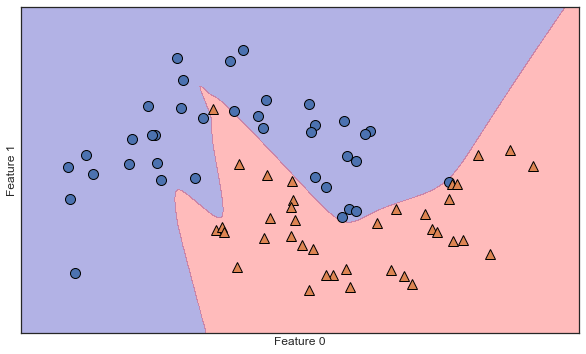

In [14]:
#包含2个隐层、每个包含10个隐单元，激活函数为tanh
mlp = MLPClassifier(solver = 'lbfgs', activation = 'tanh',
                   random_state = 0, hidden_layer_sizes = [10,10])
mlp.fit(X_train,y_train)

plt.figure(figsize = (10, 6))
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha =.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

最后还可以利用L2惩罚使权重趋向于0，从而控制神经网络的复杂度，
正如我们在岭回归和线性分类器中所做的那样。
MLPClassifier中调节L2惩罚的参数是alpha（与线性回归模型中的相同），它的默认值很小（弱正则化）。

下图显示了不同alpha值对two_moons数据集的影响，用的是2个隐层的神经网络，每层包含10个或100个单元

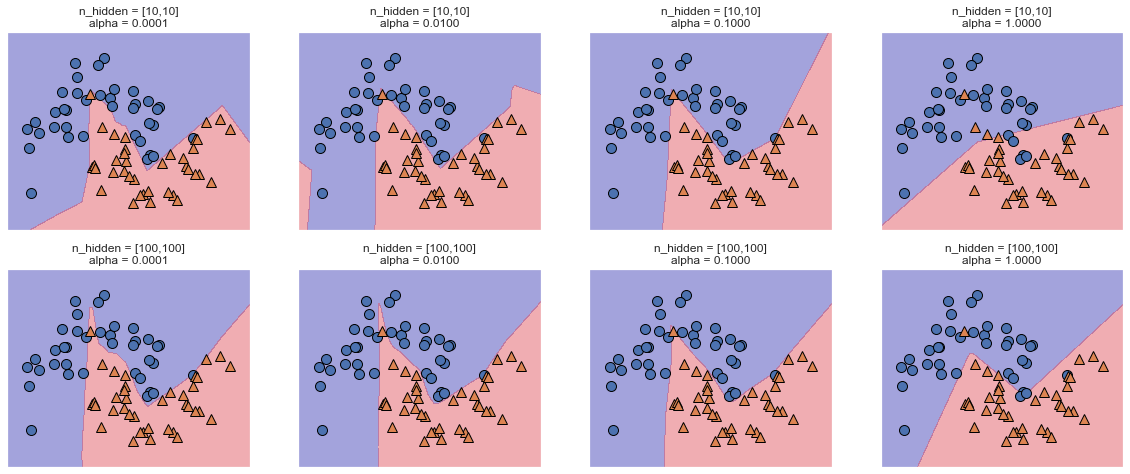

In [13]:
fig, axes = plt.subplots(2, 4, figsize = (20,8))

for axx, n_hidden_nodes in zip(axes, [10,100]):
    for ax, alpha in zip(axx, [0.0001,0.01,0.1,1]):
        mlp = MLPClassifier(solver = 'lbfgs', random_state = 0, alpha = alpha,
                            hidden_layer_sizes = [n_hidden_nodes, n_hidden_nodes])
        mlp.fit(X_train, y_train)
        
        mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, 
                                        alpha =.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1],
                                 y_train, ax = ax)
        
        ax.set_title('n_hidden = [{},{}]\nalpha = {:.4f}'.format(
            n_hidden_nodes, n_hidden_nodes, alpha))

上图为 不同隐单元个数与alpha 参数的不同设定下的决策函数

神经网络的一个重要性质是，在开始学习之前其权重是随机设置的，这种随机初始化会影响学到的模型。
也就是说，即使使用完全相同的参数，如果随机种子不同的话，我们也可能得到非常不一样的模型。

注意！！！如果神经网络很大，并且复杂度选择合理的话，那么应该不会对精度有太大影响，
而对较小的神经网络需特别注意。

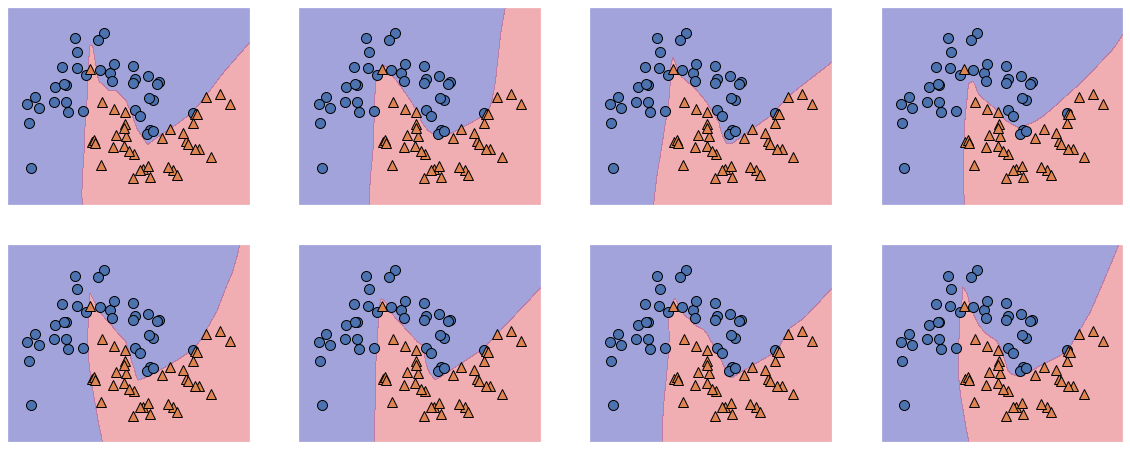

In [14]:
fig, axes = plt.subplots(2, 4, figsize = (20,8))

for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver = 'lbfgs', random_state = i,
                        hidden_layer_sizes = [100,100])
    mlp.fit(X_train, y_train)
    
    mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha =.3,ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax = ax)

上图为 相同参数但不同随机初始化的情况下学到的决策函数

## MLP应用于乳腺癌数据集

In [16]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('Cancer data per-feature maxima:\n{}'.format(cancer.data.max(axis = 0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state = 0)
mlp = MLPClassifier(random_state = 42)
mlp.fit(X_train, y_train)

print('Accuracy on training set:{:.2f}'.format(mlp.score(X_train, y_train)))
print('Accuracy on test set:{:.2f}'.format(mlp.score(X_test, y_test)))

Accuracy on training set:0.94
Accuracy on test set:0.92


In [21]:
#计算训练集中每个特征的平均值
mean_on_train = X_train.mean(axis = 0)
#计算训练集中每个特征的标准差
std_on_train = X_train.std(axis = 0)
#减去平均值，然后乘以标准差的倒数
#如此运算后，mean = 0，std = 1
X_train_scaled = (X_train - mean_on_train)/std_on_train

#对测试集做相同的变换（使用训练集的平均值和标准差）
X_test_scaled = (X_test - mean_on_train)/std_on_train
mlp = MLPClassifier(random_state = 0)
mlp.fit(X_train_scaled, y_train)

print('Accuracy on training set:{:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('Accuracy on test set:{:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set:0.991
Accuracy on test set:0.965


In [20]:
mlp = MLPClassifier(max_iter = 1000, random_state = 0)
mlp.fit(X_train_scaled, y_train)
print('Accuracy on training set:{:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('Accuracy on test set:{:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set:1.000
Accuracy on test set:0.972


增加迭代次数仅提高了训练集性能，但没有提高泛化性能。不过模型的表现相当不错。
由于训练性能和测试性能之间仍有一些差距，所以可以尝试降低模型复杂度来得到更好的泛化性能。

下面选择增大alpha参数（变化范围相当大，从0.0001到1），以此向权重添加更强的正则化：

In [20]:
mlp = MLPClassifier(max_iter = 1000, alpha = 1, random_state = 0)
mlp.fit(X_train_scaled, y_train)

print('Accuracy on training set:{:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('Accuracy on test set:{:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set:0.988
Accuracy on test set:0.972


虽然可以分析神经网络学到了什么，但这通常比分析线性模型或基于树的模型更为复杂。
要想观察模型学到了什么，一种方法是查看模型的权重。

下图显示了连接输入和第一个隐层之间的权重。图中的行对应30个输入特征，列对应100个隐单元。
浅色代表较大的正值，而深色代表负值。

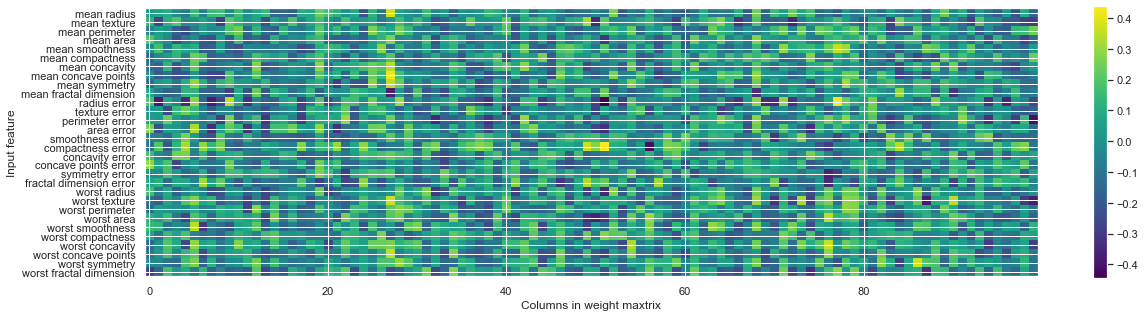

In [22]:
# 神经网络在乳腺癌数据集上学到的第一个隐层权重的热图
plt.figure(figsize = (20,5))
plt.imshow(mlp.coefs_[0], interpolation = 'none',cmap = 'viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('Columns in weight maxtrix')
plt.ylabel('Input feature')
plt.colorbar()

可以推断，如果某个特征对所有隐单元的权重都很小，那么这个特征对模型来说就“不太重要”。可以看到，与其他特征相比，“mean smoothness”、“mean compactness”、“smoothness error”和“fractal dimension error”之间的特征的权重都相对较小。这可能说明这些特征不太重要，也可能是我们没有用神经网络可以使用的方式来表示这些特征。我们还可以将连接隐层和输出层的权重可视化，但它们更加难以解释。虽然MLPClassifier和MLPRegressor为最常见的神经网络架构提供了易于使用的接口，但它们只包含神经网络潜在应用的一部分。

## 神经网络的优点、缺点和参数
---
在机器学习的许多应用中，神经网络再次成为最先进的模型。它的主要优点之一是能够获取大量数据中包含的信息，并构建无比复杂的模型。给定足够的计算时间和数据，并且仔细调节参数，神经网络通常可以打败其他机器学习算法（无论是分类任务还是回归任务）。

这就引出了下面要说的缺点。神经网络——特别是功能强大的大型神经网络——通常需要很长的训练时间。它还需要仔细地预处理数据，正如我们这里所看到的。与SVM类似，神经网络在“均匀”数据上的性能最好，其中“均匀”是指所有特征都具有相似的含义。如果数据包含不同种类的特征，那么基于树的模型可能表现得更好。神经网络调参本身也是一门艺术。调节神经网络模型和训练模型的方法有很多种。估计神经网络的复杂度。最重要的参数是层数和每层的隐单元个数。你应该首先设置1个或2个隐层，然后可以逐步增加。每个隐层的结点个数通常与输入特征个数接近，但在几千个结点时很少会多于特征个数。

在考虑神经网络的模型复杂度时，一个有用的度量是学到的权重（或系数）的个数。如果你有一个包含100个特征的二分类数据集，模型有100个隐单元，那么输入层和第一个隐层之间就有100 * 100 = 10000个权重。在隐层和输出层之间还有100 * 1 = 100个权重，总共约10100个权重。如果添加含有100个隐单元的第二个隐层，那么在第一个隐层和第二个隐层之间又有100 * 100 = 10000个权重，总数变为约20100个权重。如果你使用包含1000个隐单元的单隐层，那么在输入层和隐层之间需要学习100 * 1000 = 100000个权重，隐层到输出层之间需要学习1000 * 1 = 1000个权重，总共101000个权重。如果再添加第二个隐层，就会增加1000 * 1000 = 1000000个权重，总数变为巨大的1101000个权重，这比含有2个隐层、每层100个单元的模型要大50倍。

神经网络调参的常用方法是，首先创建一个大到足以过拟合的网络，确保这个网络可以对任务进行学习。知道训练数据可以被学习之后，要么缩小网络，要么增大alpha来增强正则化，这可以提高泛化性能。

###   应用扩展
---
如果有兴趣使用更灵活或更大的模型，建议看一下除了scikit-learn之外的很棒的深度学习库。对于Python用户来说，最为完善的是keras、lasagna和tensorflow。lasagna是基于theano库构建的，而keras既可以用tensorflow也可以用theano。这些库提供了更为灵活的接口，可以用来构建神经网络并跟踪深度学习研究的快速发展。所有流行的深度学习库也都允许使用高性能的图形处理单元（GPU），而scikit-learn不支持GPU。使用GPU可以将计算速度加快10到100倍，GPU对于将深度学习方法应用到大型数据集上至关重要。